## Emissions Data Collection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/workspaces/carbonft/data/food_emissions.csv')
df = pd.DataFrame(data)

In [4]:
print(data.head())

  Domain Code            Domain  Area Code (M49)    Area  Element Code  \
0          GT  Emissions totals              124  Canada          7234   
1          GT  Emissions totals              124  Canada          7236   
2          GT  Emissions totals              124  Canada          7230   
3          GT  Emissions totals              124  Canada        724313   
4          GT  Emissions totals              124  Canada        723113   

                            Element  Item Code           Item  Year Code  \
0            Direct emissions (N2O)       5064  Crop Residues       2018   
1          Indirect emissions (N2O)       5064  Crop Residues       2018   
2                   Emissions (N2O)       5064  Crop Residues       2018   
3  Emissions (CO2eq) from N2O (AR5)       5064  Crop Residues       2018   
4           Emissions (CO2eq) (AR5)       5064  Crop Residues       2018   

   Year  Source Code      Source Unit      Value Flag Flag Description  Note  
0  2018         305

In [5]:
# Data filtering and cleaning

df_cleaned = data.dropna()

df_filtered = df_cleaned[(df_cleaned['Year'] == 2018) & (df_cleaned['Element'] == 'Direct emissions (N2O)')]

In [ ]:
# Data aggregation
df_aggregated = df_filtered.groupby('Item').agg({'Value': 'sum'}).reset_index()

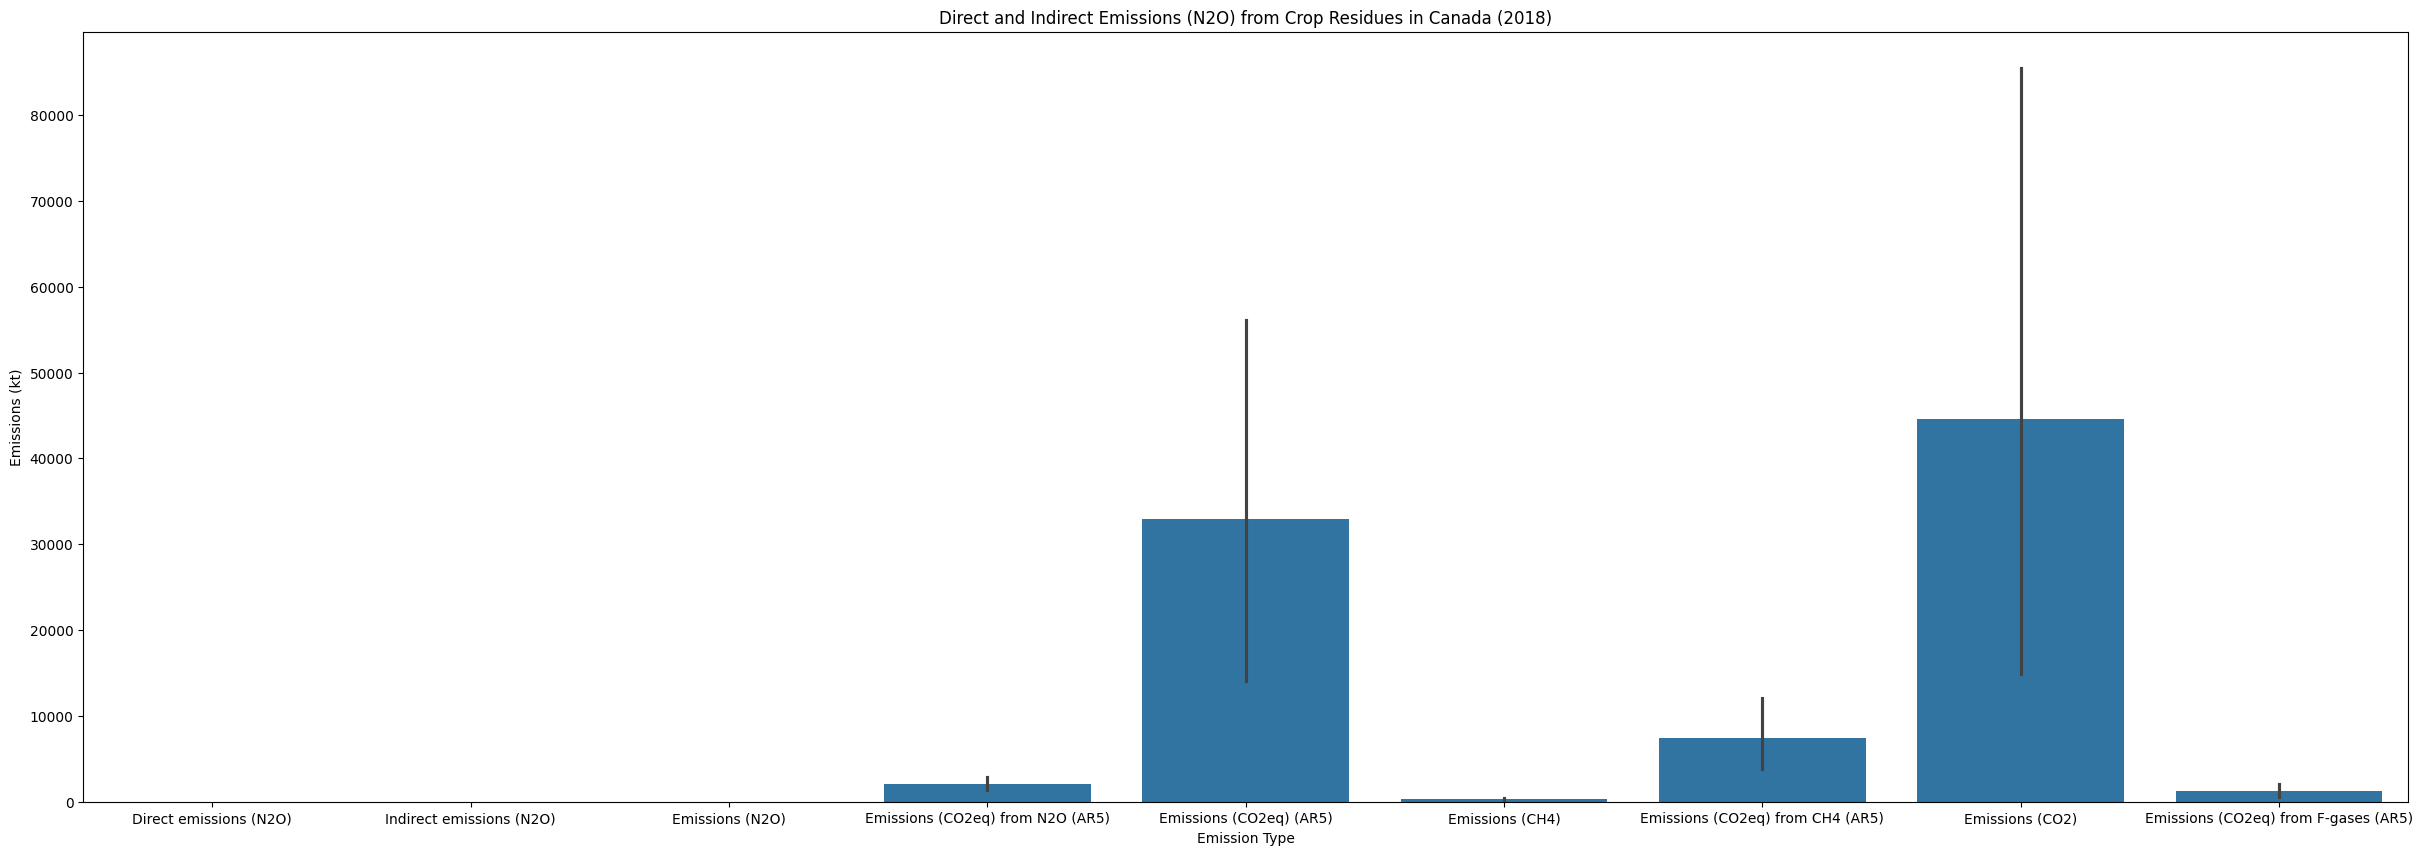

In [10]:
# Bar plot
plt.figure(figsize=(30, 10))
sns.barplot(x='Element', y='Value', data=data)
plt.title('Direct and Indirect Emissions (N2O) from Crop Residues in Canada (2018)')
plt.xlabel('Emission Type')
plt.ylabel('Emissions (kt)')
plt.show()


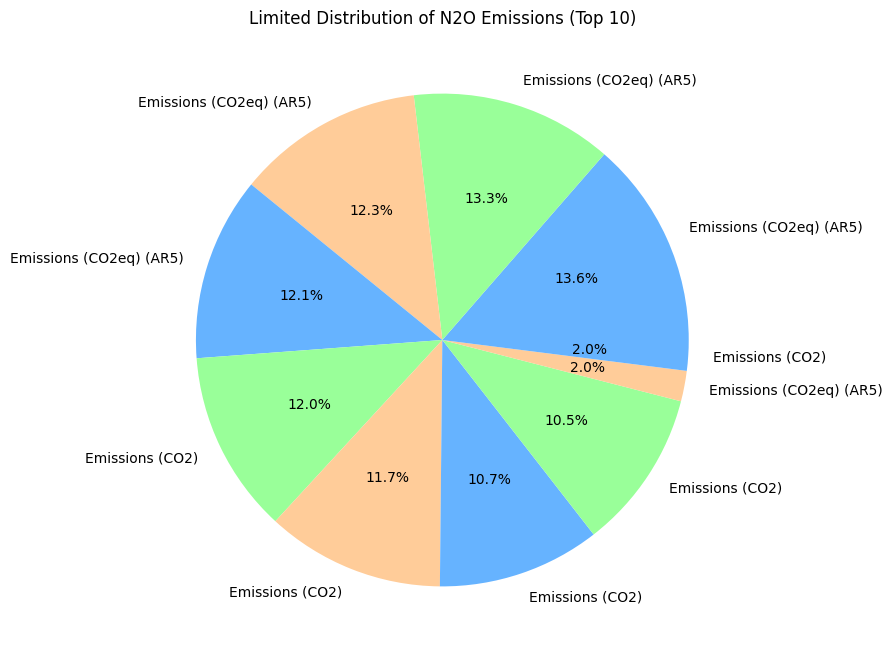

In [20]:
# Pie chart filtering and plotting
df_filtered = df[df['Value'] >= 0].dropna(subset=['Value'])

top_n = 10

df = df.sort_values(by='Value', ascending=False)

top_segments = df.iloc[:top_n]

other_value = df.iloc[top_n:]['Value'].sum()

# top_segments = top_segments.append({'Element': 'Other', 'Value': other_value}, ignore_index=True)

plt.figure(figsize=(8, 8))
plt.pie(top_segments['Value'], labels=top_segments['Element'], autopct='%1.1f%%', colors=['#66b3ff','#99ff99', '#ffcc99'])
plt.title('Limited Distribution of N2O Emissions (Top 10)')
plt.show()

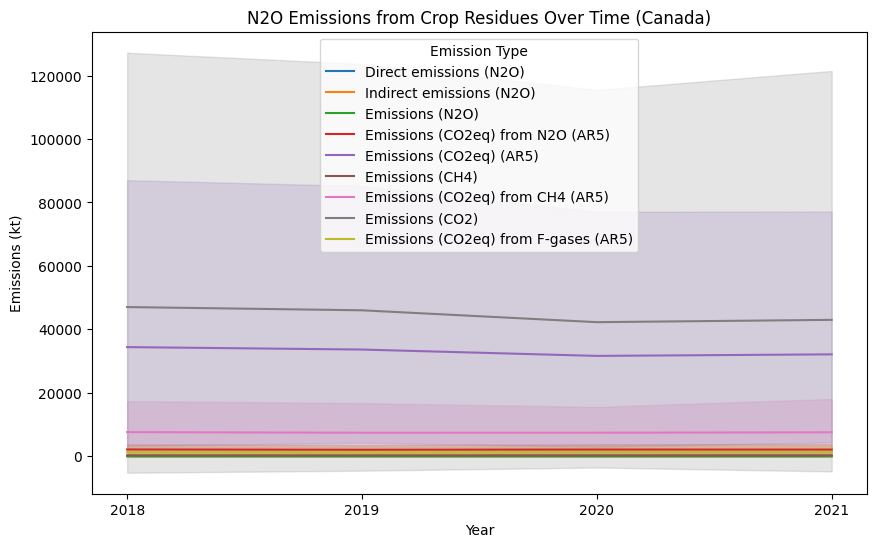

In [14]:
# Time series plot

df_time_series = df_cleaned[(df_cleaned['Item'] == 'Crop Residues')]

plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Value', hue='Element', data=df)
plt.title('N2O Emissions from Crop Residues Over Time (Canada)')
plt.xlabel('Year')
plt.ylabel('Emissions (kt)')
plt.xticks(df['Year'].unique())  # Ensure all years are labeled
plt.legend(title='Emission Type')
plt.show()